### ABOUT

This NB is intended to compare the Clarice (Esmeralda predecesor) variables between two different runs. The events analyzed are those with only 1S1, in order to know the event drift time.

### RUNS  INFORMATION
<table style="width:100%, text-align:left">
    <tr>
        <th> Run Info </th>
        <th> Run 1: 6484 </th>
        <th> Run 2: 6803 </th>
    </tr>
    <tr>
        <th>  DATE </th>
        <td> Start date: 19-11-2018 15:12:18 <br>
             End   date: 20-11-2018 15:37:38 <br>
             Duration (sec): 87920 
        </td>
        <td> Start date: 18-01-2019 12:59:16  <br>
             End   date: 20-01-2019 17:35:35  <br>
             Duration (sec): 189379
        </td>
    </tr>
    <tr>
        <th> RUN TYPE  </th>
        <td> 21 - Kr + Th at lateral port (and Cs) </td> 
        <td> 21 - Kr + Th at lateral port (and Cs) </td>  
    </tr>
    <tr>
        <th> TRIGGERS (Type 2) </th>
        <td> OK: 681687 <br>
             LOST: 112746
        </td>
        <td> OK: 552780 <br>
             LOST: 667395 
        </td>
    </tr>
    <tr>
        <th> DETECTOR CONDITIONS </th>
        <td> Presure (bar):10.29 <br>
             Temperature (ºC):22.73	<br>
             Cathode Voltage (volts):29999.90 <br>
             Gate Voltage (volts):7900.06 <br>
        </td>
        <td> Presure (bar): 10.14  <br>
             Temperature (ºC): 21.05	<br>
             Cathode Voltage (volts):30000.70 <br>
             Gate Voltage (volts): 7499.80 <br>
        </td>
    </tr>
</table>

**Comments**: DAQ buffer, PMT pedestal and gains has changed between these runs. Sources positions were interchanged between these runs.

In [1]:
import glob
import numpy  as np
import pandas as pd
import matplotlib.pyplot   as plt

In [2]:
# Plotting style
default_cmap = "viridis"
figure_size  = 15, 5
font_size    = 14

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams[  "font.size"   ]  = font_size
plt.rcParams[  "image.cmap"  ]  = default_cmap
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
#plt.rcParams["axes.grid"     ]  = True
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

In [3]:
run1 = 6484
run2 = 6803

directory = '../../DATA/'
filename1 = f'cepks_{run1}_*'
filename2 = f'cepks_{run2}_*'

data1 = pd.read_hdf(glob.glob(directory + filename1)[0], key='esum')
data2 = pd.read_hdf(glob.glob(directory + filename2)[0], key='esum')

In [4]:
data1.keys()

Index(['event', 'peak', 'location', 'nslices', 'nhits', 'noqslices', 'time',
       's1e', 't0', 'rmax', 'rsize', 'zmax', 'zsize', 'x0', 'y0', 'z0', 'e0',
       'q0', 'e0h', 'q0h', 'x', 'y', 'z', 'q', 'e', 'eh', 'qh', 'xu', 'yu',
       'zu', 'e0f', 'e0b', 'ef', 'eb', 'e1', 'x1', 'y1', 'z1', 'e2', 'x2',
       'y2', 'z2', 'eblob1', 'eblob2', 'd12'],
      dtype='object')

In [5]:
N1 = len(data1)
T1 = (data1['time'].max()-data1['time'].min())*1e-3
rate1 = N1/T1

print(f'Run: {run1}')
print(f'Number of events:', N1)
print(f'Duration:', T1)
print(f'Rate (Hz):', rate1)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
Run: 6484
Number of events: 528351
Duration: 87864.98300000001
Rate (Hz): 6.013214615884008


In [6]:
N2 = len(data2)
T2 = (data2['time'].max()-data2['time'].min())*1e-3
rate2 = N2/T2

print(f'Run: {run2}')
print(f'Number of events:', N2)
print(f'Duration:', T2)
print(f'Rate (Hz):', rate2)

Run: 6803
Number of events: 299465
Duration: 122411.925
Rate (Hz): 2.446371135818671


In [7]:
def histo_1d(values_run1, values_run2=None, xlabel=None ,rg= None, nbins=100, scale=None, rate=False):
    '''
    Arguments:
    
    values = values to be histogramed
    xlabel = str with label to x axis
    rg  = range of the histogram
    nbins = number of bins of the histogram
    scale = scale of the y axis
    
    '''
    values_run1 = np.array(values_run1)
    
    if rg is None: 
        rg =(values_run1.min(), values_run1.max())
        
        if values_run2 is not None:
            mins=np.array([values_run1.min(), values_run2.min()])
            maxs=np.array([values_run1.max(), values_run2.max()])
            rg = (mins.min(), maxs.max())
    
    H1, edg = np.histogram(values_run1, range=rg, bins=nbins)
    x = [(edg[i+1]+edg[i])/2. for i in range(0, len(edg)-1)]
    N1 = len(values_run1)
    
    fig = plt.figure()
    ax = fig.add_subplot(121)
    
    if rate is False: ax.step(x, H1/N1, where='mid', label=f'{run1}', c='blue')
    else:
                      ax.step(x, H1/T1, where='mid', label=f'{run1}', c='blue')
                      ax.set_ylabel('Rate (Hz)')
                    
    
    ax.set_xlabel(xlabel)
    
    if values_run2 is not None:
        values_run2 = np.array(values_run2)
        H2, _   = np.histogram(values_run2, range=rg, bins=nbins)
        N2 = len(values_run2)
        
        if rate is False: ax.step(x, H2/N2, where='mid', label=f'{run2}', c='red')
        else:             ax.step(x, H2/T2, where='mid', label=f'{run2}', c='red')
        
        ax2 = fig.add_subplot(122)
        if rate is False: ax2.scatter(x, H1/N1*N2/H2, s=3, color='black')
        else:             ax2.scatter(x, H1/T1*T2/H2, s=3, color='black')
        
        ax2.set_xlabel(xlabel)
        ax2.set_ylabel('Run1/Run2')
        
    ax.legend()
    if scale is not None: ax.set_yscale(scale)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


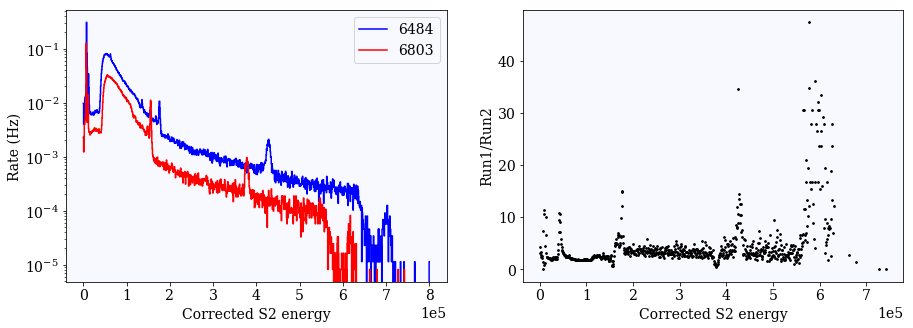

In [8]:
histo_1d(data1['e'].values,
         data2['e'].values,
         xlabel='Corrected S2 energy',
         rg = (0, 8e5), 
         nbins=1000, 
         scale='log',
         rate=True)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


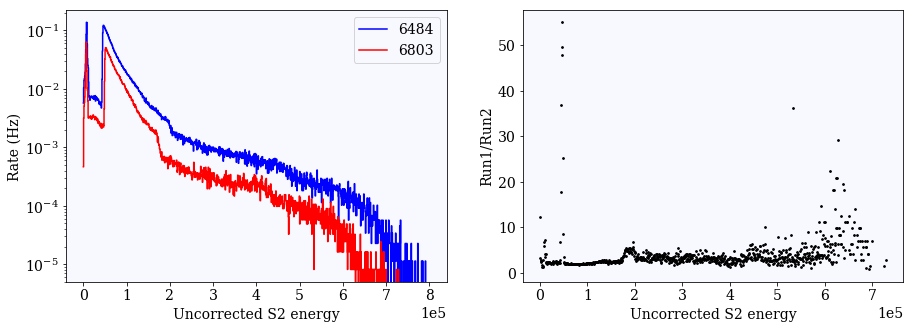

In [9]:
histo_1d(data1['e0'].values,
         data2['e0'].values,
         xlabel='Uncorrected S2 energy',
         rg = (0, 8e5), 
         nbins=1000, 
         scale='log',
         rate=True)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


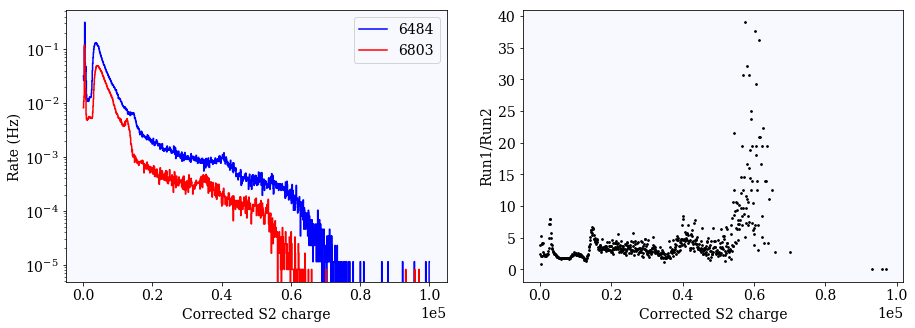

In [10]:
histo_1d(data1['q'].values,
         data2['q'].values,
         xlabel='Corrected S2 charge',
         rg = (0, 1e5), 
         nbins=1000, 
         scale='log',
         rate=True)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


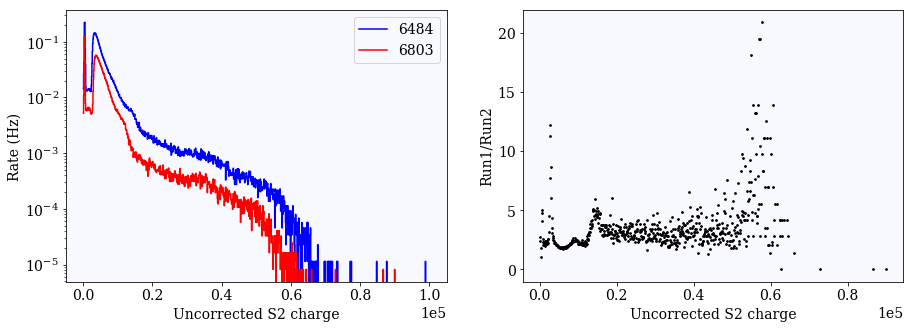

In [11]:
histo_1d(data1['q0'].values,
         data2['q0'].values,
         xlabel='Uncorrected S2 charge',
         rg = (0, 1e5), 
         nbins=1000, 
         scale='log',
         rate=True)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


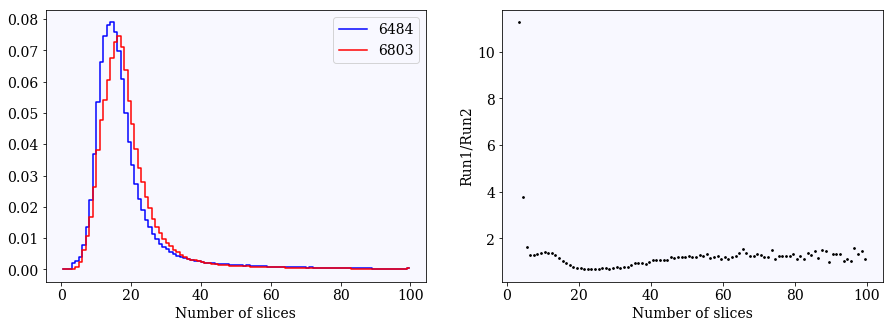

In [12]:
histo_1d(data1['nslices'].values,
         data2['nslices'].values,
         xlabel='Number of slices',
         rg = (0, 100))

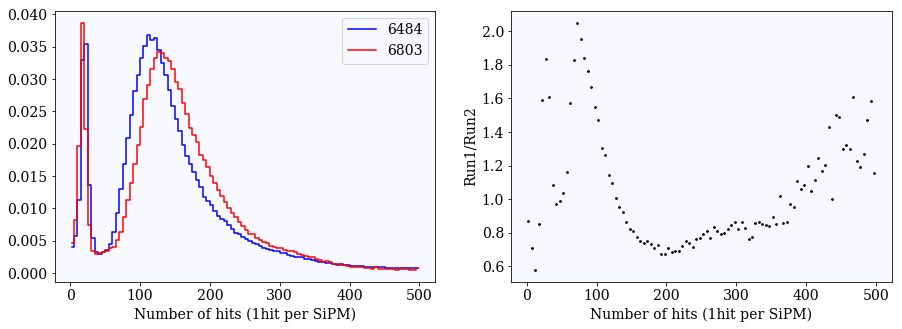

In [13]:
histo_1d(data1['nhits'].values,
         data2['nhits'].values,
         xlabel='Number of hits (1hit per SiPM)',
         rg=(0, 500))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


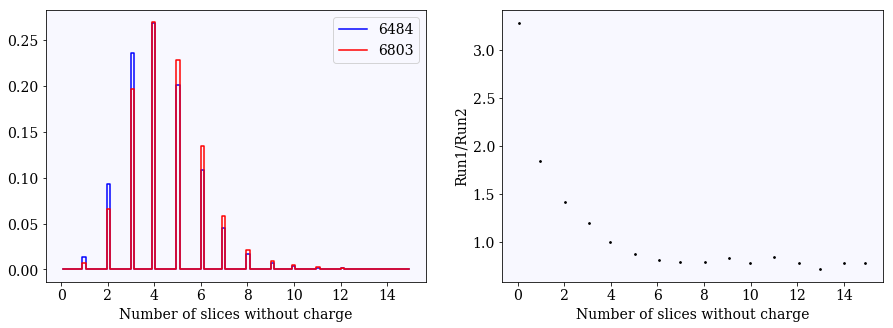

In [14]:
histo_1d(data1['noqslices'].values,
         data2['noqslices'].values,
         xlabel='Number of slices without charge',
         rg=(0, 15))

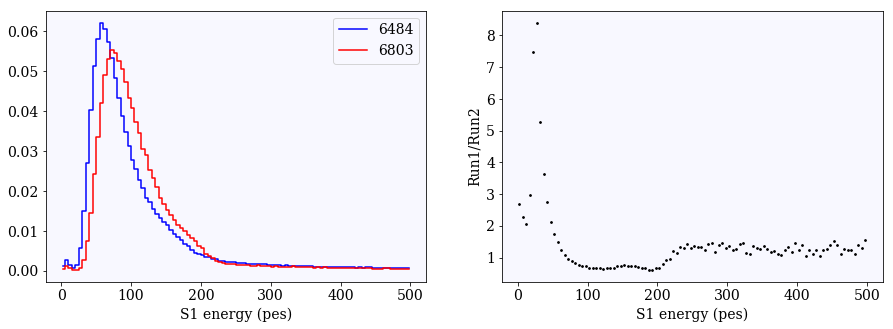

In [15]:
histo_1d(data1['s1e'].values,
         data2['s1e'].values,
         xlabel='S1 energy (pes)',
         rg=(0, 500))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


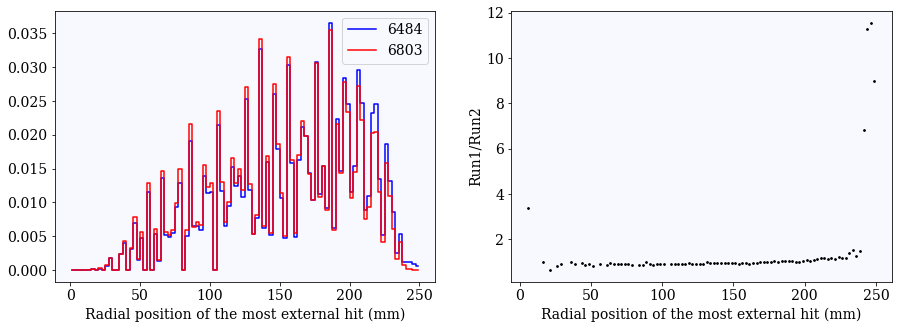

In [16]:
histo_1d(data1['rmax'].values,
         data2['rmax'].values,
         xlabel='Radial position of the most external hit (mm)',
         rg=(0, 250))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


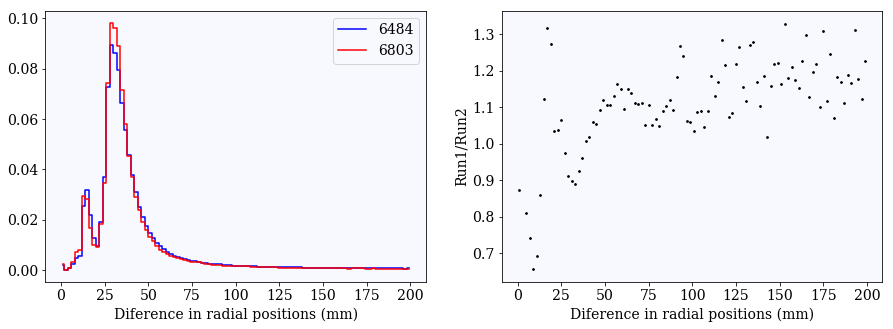

In [17]:
histo_1d(data1['rsize'].values,
         data2['rsize'].values,
         xlabel='Diference in radial positions (mm)',
         rg=(0, 200))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


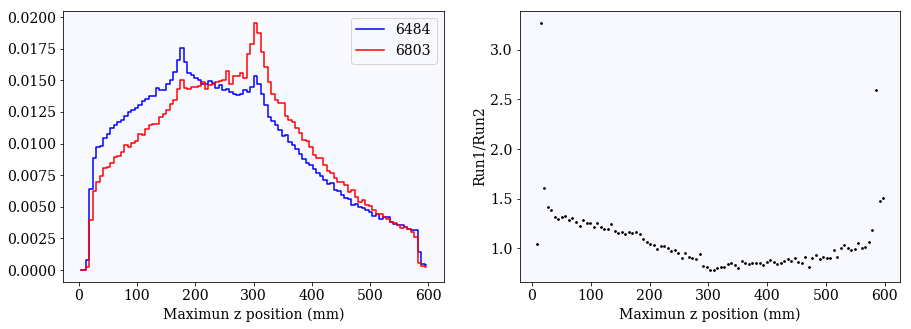

In [18]:
histo_1d(data1['zmax'].values,
         data2['zmax'].values,
         xlabel='Maximun z position (mm)',
         rg=(0, 600))

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


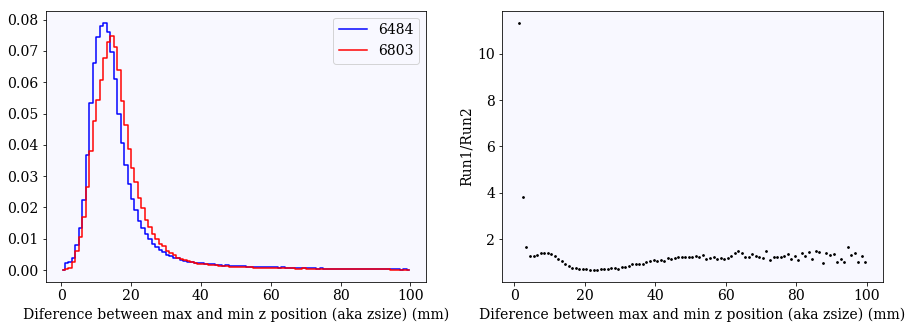

In [19]:
histo_1d(data1['zsize'].values,
         data2['zsize'].values,
         xlabel='Diference between max and min z position (aka zsize) (mm)',
         rg=(0, 100))

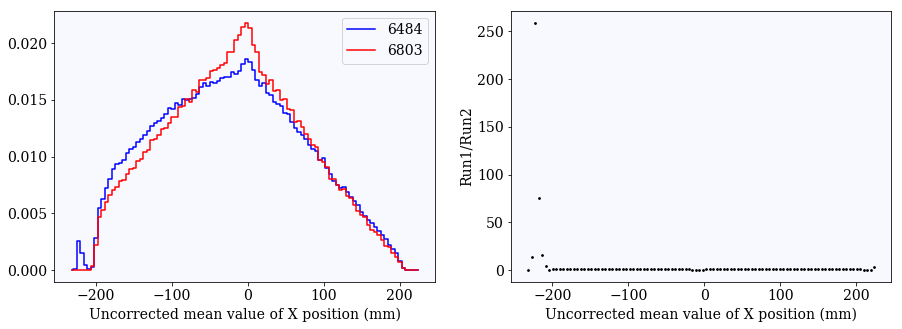

In [20]:
histo_1d(data1['x0'].values,
         data2['x0'].values,
         xlabel='Uncorrected mean value of X position (mm)')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide


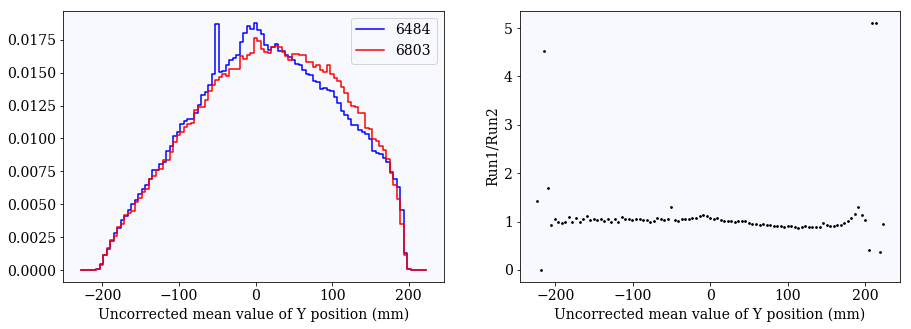

In [21]:
histo_1d(data1['y0'].values,
         data2['y0'].values,
         xlabel='Uncorrected mean value of Y position (mm)')

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


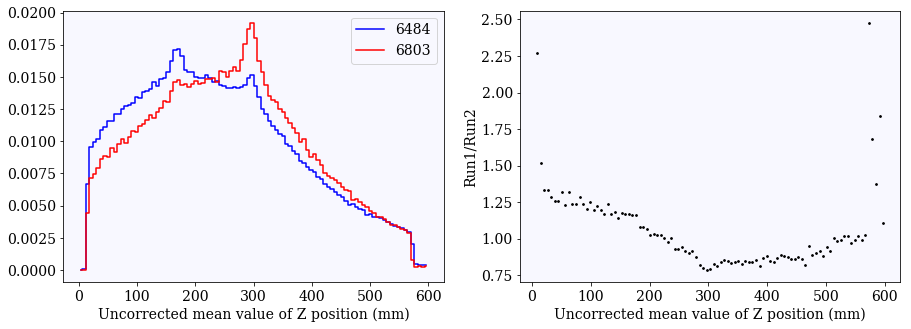

In [22]:
histo_1d(data1['z0'].values,
         data2['z0'].values,
         xlabel='Uncorrected mean value of Z position (mm)',
         rg=(0, 600))